In [1]:
#Importación de la librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Limpieza de México**

In [2]:
df_mexico=pd.read_csv("mexico.csv")
df_mexico.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,...,4.96,4.93,4.91,NaN,f,3,2,1,0,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,13,4,2,0,0.42


In [4]:
pd.set_option('display.max_rows', None)
df_mexico.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [5]:
#Se eliminan los valores nulos
df_mexico.isnull().sum()
df_mexico=df_mexico.fillna(method='ffill')
df_mexico=df_mexico.fillna(method='bfill')

C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_20032\1557209292.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_mexico=df_mexico.fillna(method='ffill')
C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_20032\1557209292.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_mexico=df_mexico.fillna(method='bfill')


In [6]:
#Como no funciono el bfill y ffill usamos el metodo de sustituir por una palabra 
df_mexico1=df_mexico.fillna('nulos')
df_mexico1.info()
df_mexico1.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26536 non-null  int64  
 1   listing_url                                   26536 non-null  object 
 2   scrape_id                                     26536 non-null  int64  
 3   last_scraped                                  26536 non-null  object 
 4   source                                        26536 non-null  object 
 5   name                                          26536 non-null  object 
 6   description                                   26536 non-null  object 
 7   neighborhood_overview                         26536 non-null  object 
 8   picture_url                                   26536 non-null  object 
 9   host_id                                       26536 non-null 

0

In [9]:
#Reemplazamos el $ en la columna price para que se vuelva numerica 
df_mexico1['price'] = df_mexico1['price'].str.replace('$', '', regex=False)
df_mexico1['price'] = df_mexico1['price'].str.replace(',', '', regex=False)
df_mexico1['price'] = pd.to_numeric(df_mexico1['price'])

In [11]:
#Comprobamos que el valor ya sea numerico 
df_mexico1['price']

0          1652.0
1          3663.0
2         18000.0
3           814.0
4          1923.0
5          1636.0
6          1374.0
7          1191.0
8          2337.0
9          3444.0
10         3444.0
11         6869.0
12         3480.0
13          366.0
14          315.0
15          898.0
16         1575.0
17         1200.0
18         1200.0
19         1200.0
20         1200.0
21         4488.0
22        11000.0
23          650.0
24          800.0
25          780.0
26          385.0
27         1222.0
28         1055.0
29          641.0
30          900.0
31          344.0
32         3041.0
33         3041.0
34         1117.0
35          800.0
36          800.0
37         2543.0
38         2543.0
39         1007.0
40          641.0
41          641.0
42          641.0
43         1698.0
44          816.0
45          989.0
46          989.0
47         3114.0
48          450.0
49          547.0
50          385.0
51          800.0
52          609.0
53          609.0
54         1300.0
55        

In [12]:
#Se separan las columnas por cualitativas y cuantitativas
numcol=df_mexico1.select_dtypes(include=['number'])
catcol=df_mexico1.select_dtypes(include=['object'])

In [13]:
#Se procesan los datos nulos de las varibales numericas 
numcol.isnull().sum().sum()
numcol=numcol.fillna(method='ffill')
numcol=numcol.fillna(method='bfill')

C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_20032\3788119204.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numcol=numcol.fillna(method='ffill')
C:\Users\Rene Vazquez\AppData\Local\Temp\ipykernel_20032\3788119204.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numcol=numcol.fillna(method='bfill')


In [14]:
#Comprobamos los valores faltantes nuevamente 
numcol.isnull().sum().sum()

0

In [15]:
numcol_sinid=numcol.drop(['id','host_id','scrape_id'],axis=1)

<Figure size 1500x800 with 0 Axes>

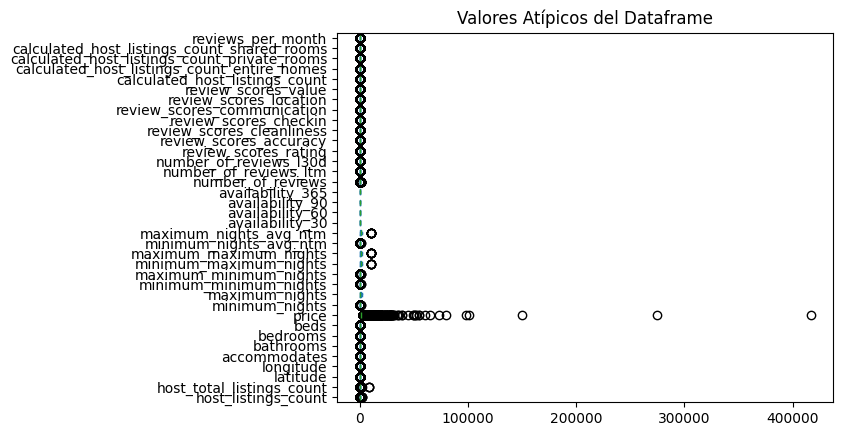

In [16]:
#Obtenemos los limites superior e inferior de todas las variables numericas
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
numcol_sinid.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [17]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=numcol_sinid
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_listings_count                               276.116185
host_total_listings_count                         488.576569
latitude                                           19.532579
longitude                                         -99.066564
accommodates                                       10.367106
bathrooms                                           4.583760
bedrooms                                            5.428119
beds                                                7.126800
price                                           13370.348313
minimum_nights                                     77.158698
maximum_nights                                   1839.512539
minimum_minimum_nights                             74.152603
maximum_minimum_nights                             81.145008
minimum_maximum_nights                           2137.156955
maximum_maximum_nights                           2177.492091
minimum_nights_avg_ntm                             74.75090

In [18]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
numcol_outliers= numcol_sinid[(y<=Limite_Superior)&(y>=Limite_Inferior)]
numcol_outliers.head(3)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.0,6.0,19.42063,-99.16586,2.0,1.0,1.0,2.0,1652.0,3.0,...,4.95,4.93,4.96,4.93,4.91,3.0,2.0,1.0,0.0,0.41
1,1.0,1.0,19.38283,NaN,2.0,1.0,1.0,1.0,3663.0,1.0,...,4.95,4.93,4.96,4.93,4.91,1.0,1.0,0.0,0.0,0.41
2,17.0,17.0,19.41162,-99.17794,NaN,NaN,5.0,NaN,NaN,1.0,...,4.70,4.87,4.78,4.98,4.48,13.0,4.0,2.0,0.0,0.42


In [19]:
#Comprobamos los valores atipicos que se volvieron nulos 
numcol_outliers.isnull().sum()

host_listings_count                             791
host_total_listings_count                       415
latitude                                        359
longitude                                       702
accommodates                                    500
bathrooms                                       360
bedrooms                                        287
beds                                            353
price                                           139
minimum_nights                                  187
maximum_nights                                    0
minimum_minimum_nights                          171
maximum_minimum_nights                          190
minimum_maximum_nights                            6
maximum_maximum_nights                           10
minimum_nights_avg_ntm                          180
maximum_nights_avg_ntm                           10
availability_30                                   0
availability_60                                   0
availability

In [20]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
numcol_clean=numcol_outliers.copy()
numcol_clean=numcol_clean.fillna(round(numcol_outliers.mean(),1))
numcol_clean.head(3)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.0,6.0,19.42063,-99.16586,2.0,1.0,1.0,2.0,1652.0,3.0,...,4.95,4.93,4.96,4.93,4.91,3.0,2.0,1.0,0.0,0.41
1,1.0,1.0,19.38283,-99.20000,2.0,1.0,1.0,1.0,3663.0,1.0,...,4.95,4.93,4.96,4.93,4.91,1.0,1.0,0.0,0.0,0.41
2,17.0,17.0,19.41162,-99.17794,3.1,1.4,5.0,1.8,1314.4,1.0,...,4.70,4.87,4.78,4.98,4.48,13.0,4.0,2.0,0.0,0.42


In [21]:
#Corroboramos valores nulos del dataframe LIMPIO
numcol_clean.isnull().sum().sum()

0

In [24]:
# Unimos los otros data frame para ver que esten limpios
dfm_limpio = pd.concat([numcol_clean,numcol,catcol], axis=1)
dfm_limpio.head(3)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,room_type,bathrooms_text,amenities,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,3.0,6.0,19.42063,-99.16586,2.0,1.0,1.0,2.0,1652.0,3.0,...,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",nulos,t,2024-06-28,2013-03-30,2024-04-17,nulos,f
1,1.0,1.0,19.38283,-99.20000,2.0,1.0,1.0,1.0,3663.0,1.0,...,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",nulos,t,2024-06-27,2013-03-30,2024-04-17,nulos,f
2,17.0,17.0,19.41162,-99.17794,3.1,1.4,5.0,1.8,1314.4,1.0,...,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",nulos,t,2024-06-28,2011-11-09,2023-03-26,nulos,f


In [25]:
dfm_limpio.isnull().sum().sum()

0

In [ ]:
dfm_limpio.to_csv("mexico_limpio.csv")

*En cuanto a los métodos de imputación utilizados, para las variables categóricas (strings) se optó por reemplazarlas con la palabra "nulo", ya que es el único método que resultó funcional en este contexto. Para el primer filtrado de las variables numéricas, se aplicaron los métodos de imputación forward fill (ffill) y backward fill (bfill) con el fin de aportar consistencia a los datos. Posteriormente, al eliminar los valores atípicos, se utilizó la imputación mediante la media. Esto se realizó una vez que la base de datos había adquirido mayor robustez, lo que permitió que la media proporcionara una estimación más cercana a la realidad en la imputación de datos.*